# Adaptive Thresholding: Edge Detection in Images

* Using OpenCV, first convert any image with varying ligh condition to a grayscale image. 
* Now implement edge detection first using the canny edge detection. 
* Then apply simple thresholding and also Adaptive/OTSU thresholding using OpenCV to see the working of each of these methods. 
* Once you obtain good results, use the obtained edge detection result as a mask to give color to all the edges (if edges use the color from the original image, else leave it black only.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(2988, 5312, 3)


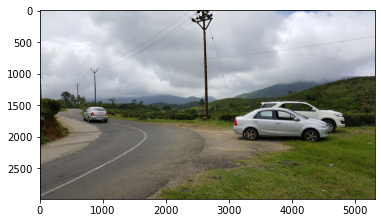

In [2]:
img = cv2.imread("20150824_110604.jpg")
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#### Resizing Image

(597, 1062, 3)


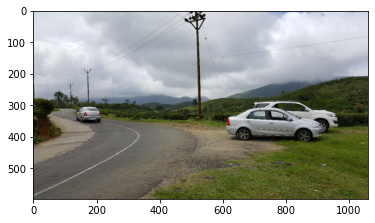

In [3]:
scale= 0.2
# scale= 0.5
w,h = int(img.shape[0]*scale), int(img.shape[1]*scale)
resized_img = cv2.resize(img, (h, w))
print(resized_img.shape)
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))

###  1. Convert any image with varying ligh condition to a grayscale image

(597, 1062)


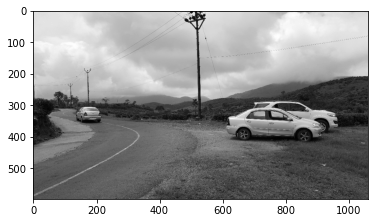

In [4]:
grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
print(grayscale_img.shape)
plt.imshow(grayscale_img, cmap='gray')

### 2. Now implement edge detection first using the canny edge detection.

* The implementation of Canny Edge Detection requires that Noise be removed so as to avoid ghost edges.
* For that purpose , blurring the image greatly reduces noise.
* Which shall implement 2 methods;
    1. Gaussian Blur
    2. Bilateral Filtering Blur
* Then choose the better method.

In [5]:
# Gaussian Blur
ga_blurred_img = cv2.GaussianBlur(grayscale_img, (5,5), 10, 10)

#Bilateral Filtering Blur
bl_blurred_img = cv2.bilateralFilter(grayscale_img, 9, 75, 75 )

In [6]:
# Displaying using OpenCV for better visual representation.

cv2.imshow("Original Image", grayscale_img)
cv2.imshow("Gaussian Blurred Image", ga_blurred_img)
cv2.imshow( "Bilateral Filtering Blurred Image", bl_blurred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

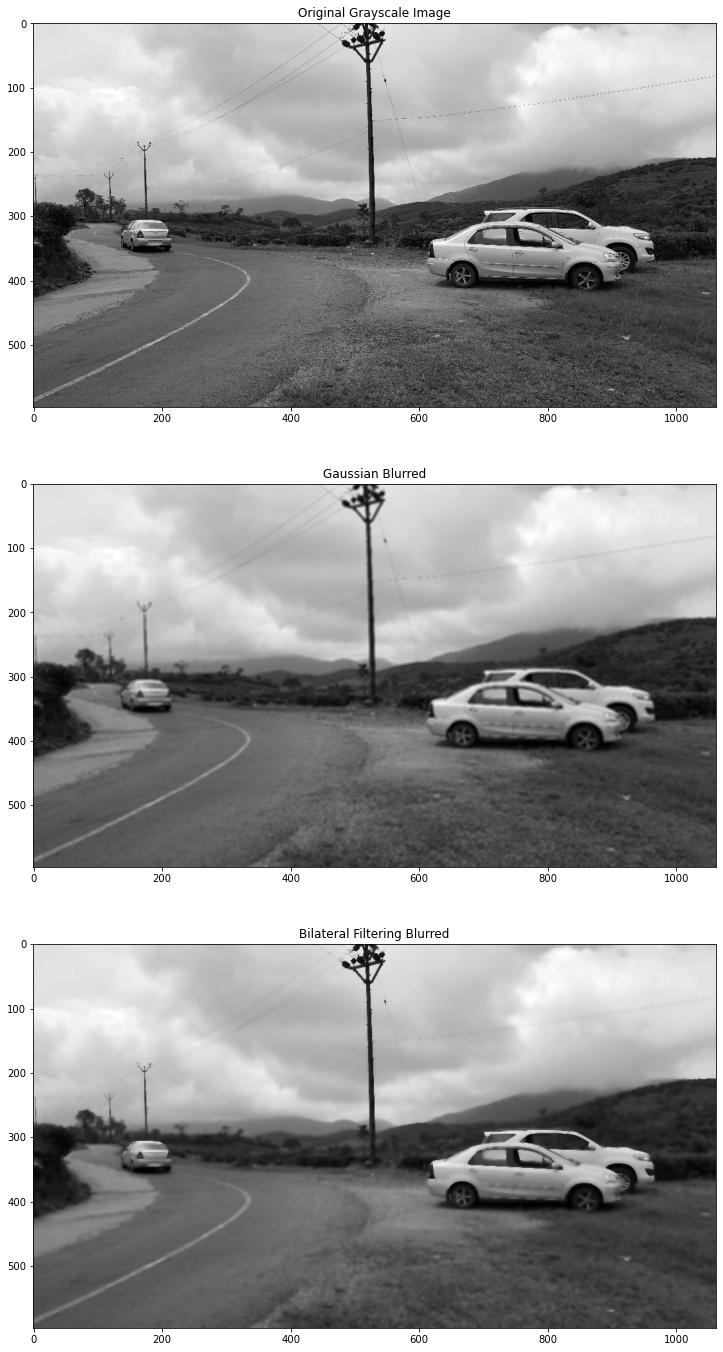

In [7]:
# Displaying using Matplotlib for better in-notebook representation.

fig, ax = plt.subplots(3,1, figsize=(40,24))
ax[0].imshow(grayscale_img,cmap = 'gray')
ax[0].set_title("Original Grayscale Image")
ax[1].imshow(ga_blurred_img,cmap = 'gray')
ax[1].set_title("Gaussian Blurred")
ax[2].imshow(bl_blurred_img, cmap = 'gray')
ax[2].set_title("Bilateral Filtering Blurred");



* From the above implementation of Gaussian and Bilateral Filtering Blur, it is evident that it is in the case of Bilateral Fitlering, the edges are less affected by the Blur Kernel, which ironically is a Gaussian Kernal.
* So, we go ahead with Bilateral Filtering Blue.

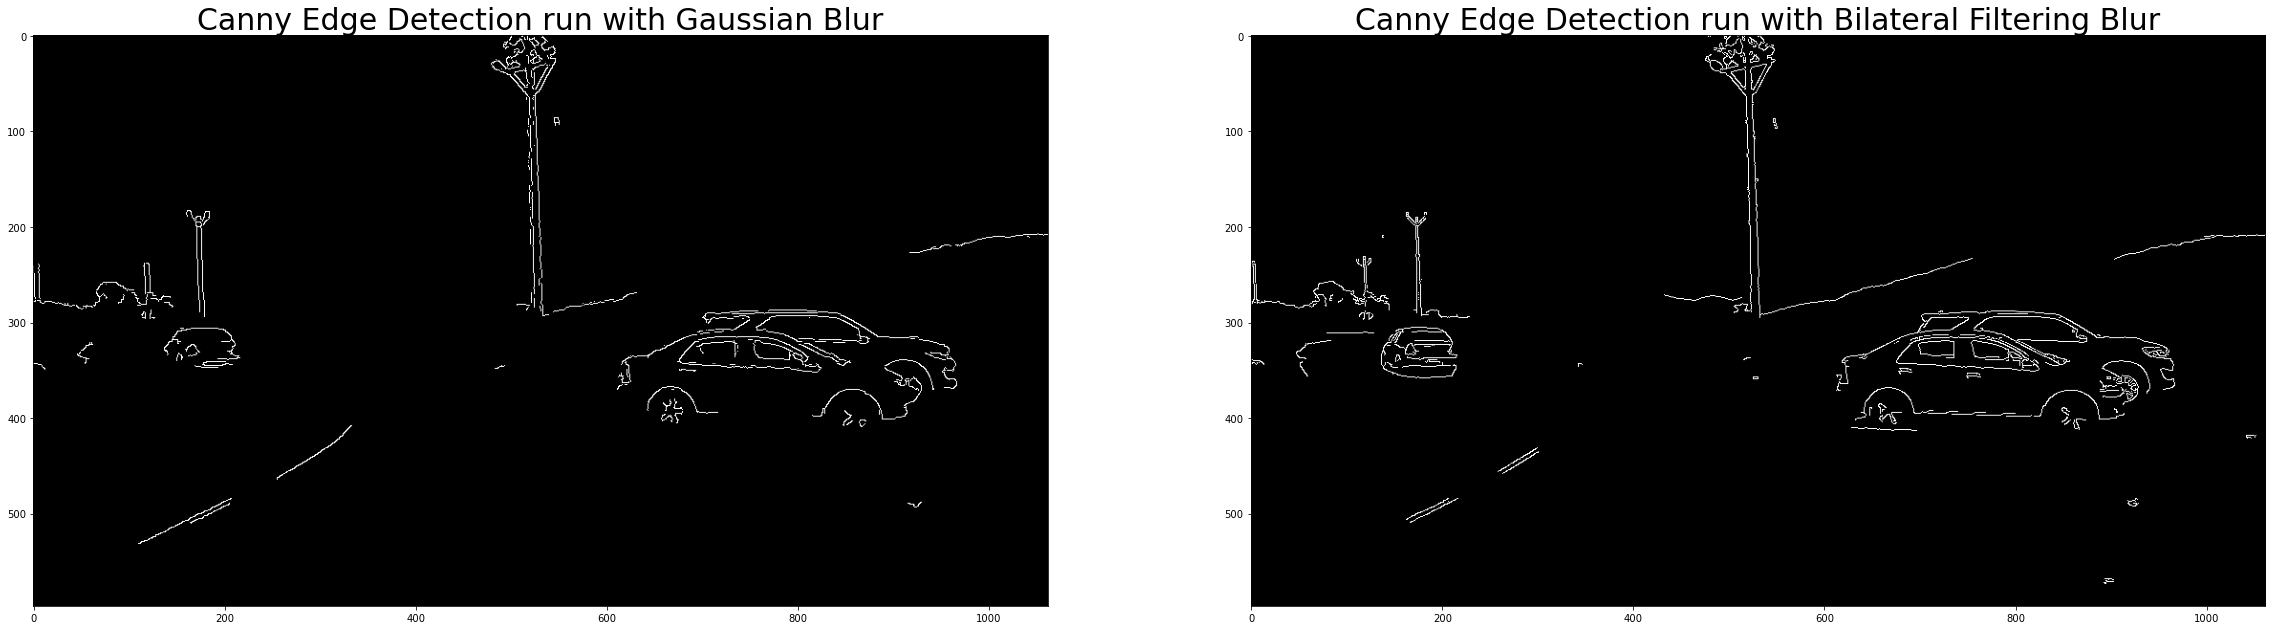

In [8]:
edge_img_bl = cv2.Canny(bl_blurred_img, threshold1 = 100, threshold2=200)
edge_img_ga = cv2.Canny(ga_blurred_img, threshold1 = 100, threshold2=200)

# cv2.imshow("Original Image", resized_img)
# cv2.imshow("Canny Edge Detected Image", edge_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
fig, ax = plt.subplots(1,2, figsize=(40,24))
ax[1].imshow(edge_img_bl,cmap = 'gray')
ax[1].set_title("Canny Edge Detection run with Bilateral Filtering Blur", size = 30)
ax[0].imshow(edge_img_ga,cmap = 'gray')
ax[0].set_title("Canny Edge Detection run with Gaussian Blur", size = 30);


* Showing once again that the Bilateral Filtering Blur works better for Canny Edge Detection.

#### Tweaking the Canny Edge Detector on a Bilateral Filtering Image

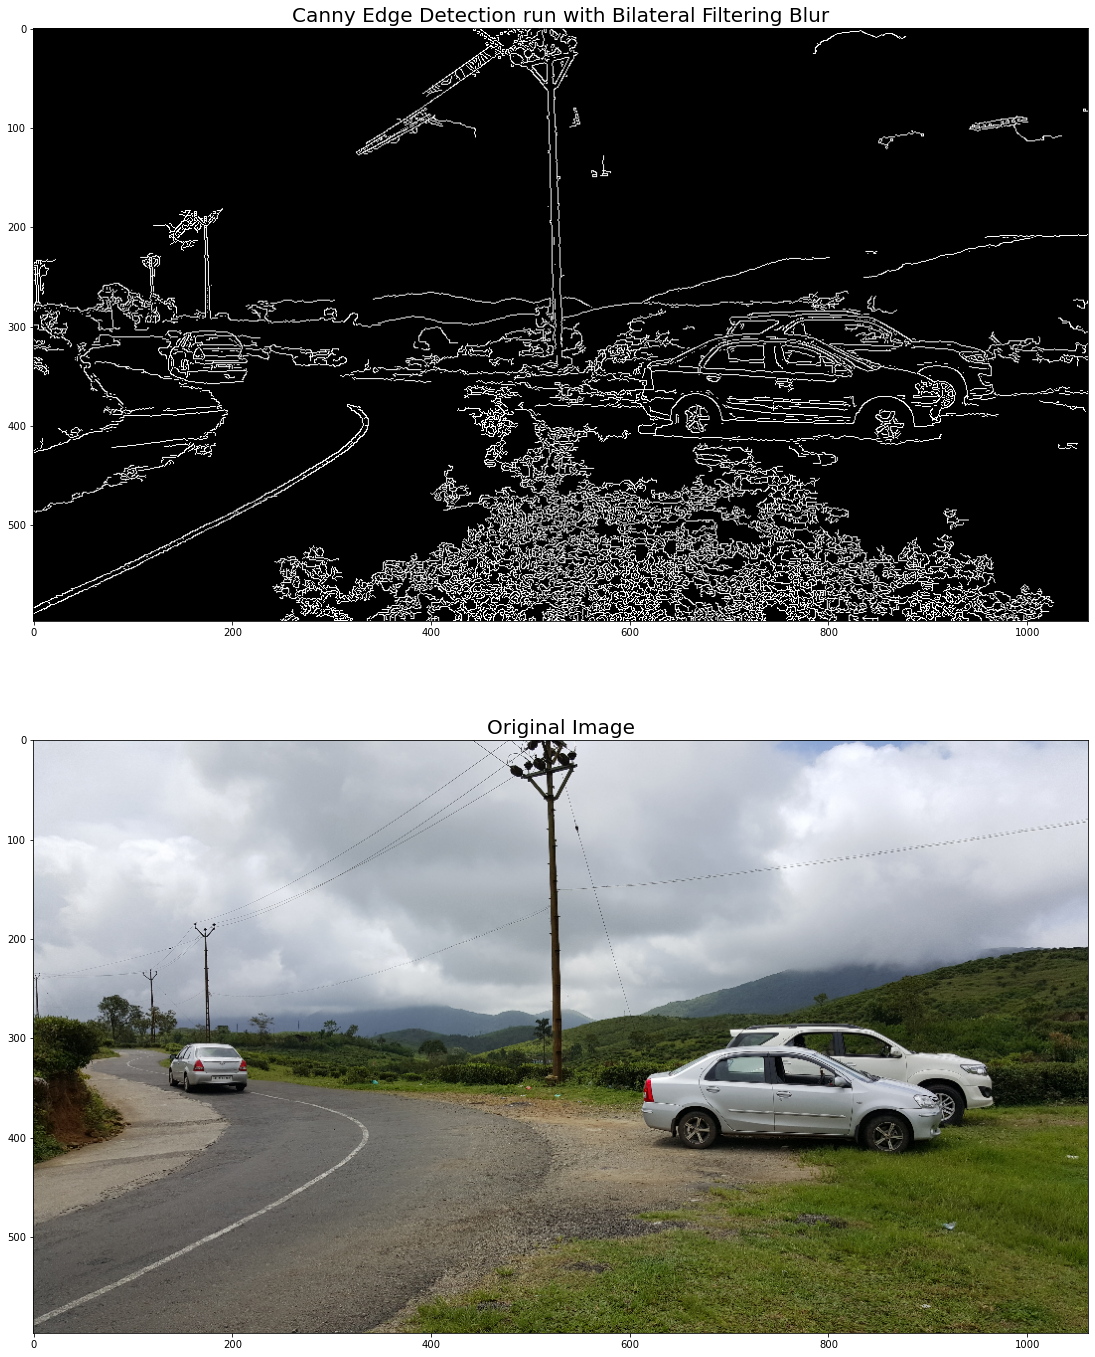

In [9]:
edge_img_bl = cv2.Canny(bl_blurred_img, threshold1 =-50 ,threshold2=50, L2gradient= True)
fig, ax = plt.subplots(2,1, figsize=(40,24))
ax[1].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Original Image", size = 20)
ax[0].imshow(edge_img_bl,cmap = 'gray')
ax[0].set_title("Canny Edge Detection run with Bilateral Filtering Blur", size = 20);

In [10]:
edge_img_bl.shape

(597, 1062)

### 3. Then apply simple thresholding and also Adaptive/OTSU thresholding using OpenCV to see the working of each of these methods.

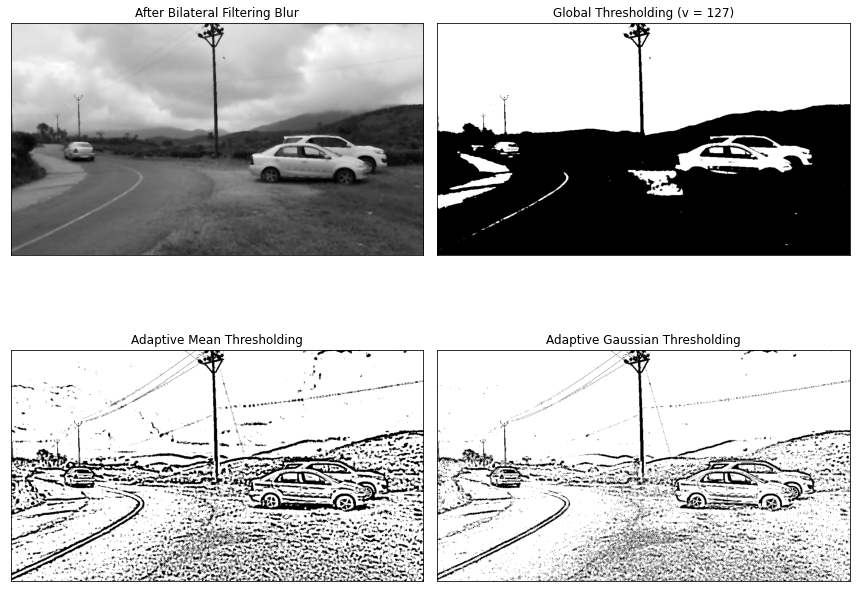

In [11]:
img1 = bl_blurred_img ## Remove noise using median Blur

## 2nd argument - threshold, 3rd Argument - Value assigned if pixel is greater than threshold
th = 127
thresh,th1_img1 = cv2.threshold(img1,th,255,cv2.THRESH_BINARY) 

## threshold value is the mean of neighbourhood area
th2_img1 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)

## threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
th3_img1 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2) 

titles = ['After Bilateral Filtering Blur','Global Thresholding (v = {})'.format(th),
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img1, th1_img1, th2_img1, th3_img1]

plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.tight_layout()
plt.show()

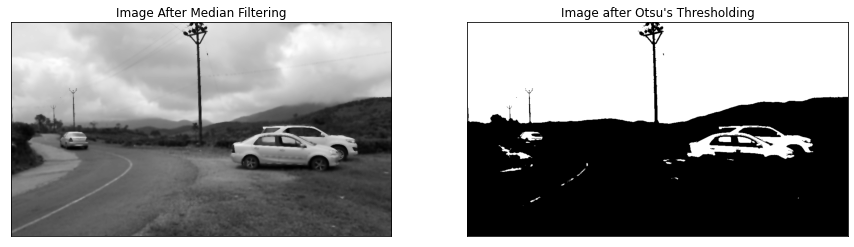

In [22]:
ret2,th2 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img1,'gray')
plt.xticks([]),plt.yticks([])
plt.title("Image After Median Filtering")

plt.subplot(1,2,2)
plt.imshow(th2,'gray')
plt.xticks([]),plt.yticks([])
plt.title("Image after Otsu's Thresholding")
plt.show()

### 4 .Once you obtain good results, use the obtained edge detection result as a mask to give color to all the edges (if edges use the color from the original image, else leave it black only.

##### Converting the image back into an image of 3 dimensions.

In [13]:
dim = np.zeros(edge_img_bl.shape)
dim.shape
R = (np.stack((edge_img_bl,edge_img_bl, edge_img_bl), axis=2))

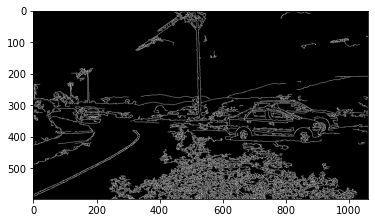

In [14]:
plt.imshow(cv2.cvtColor(R, cv2.COLOR_BGR2RGB))

In [15]:
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R[i][j].sum() != 0:
            R[i][j] = resized_img[i][j]

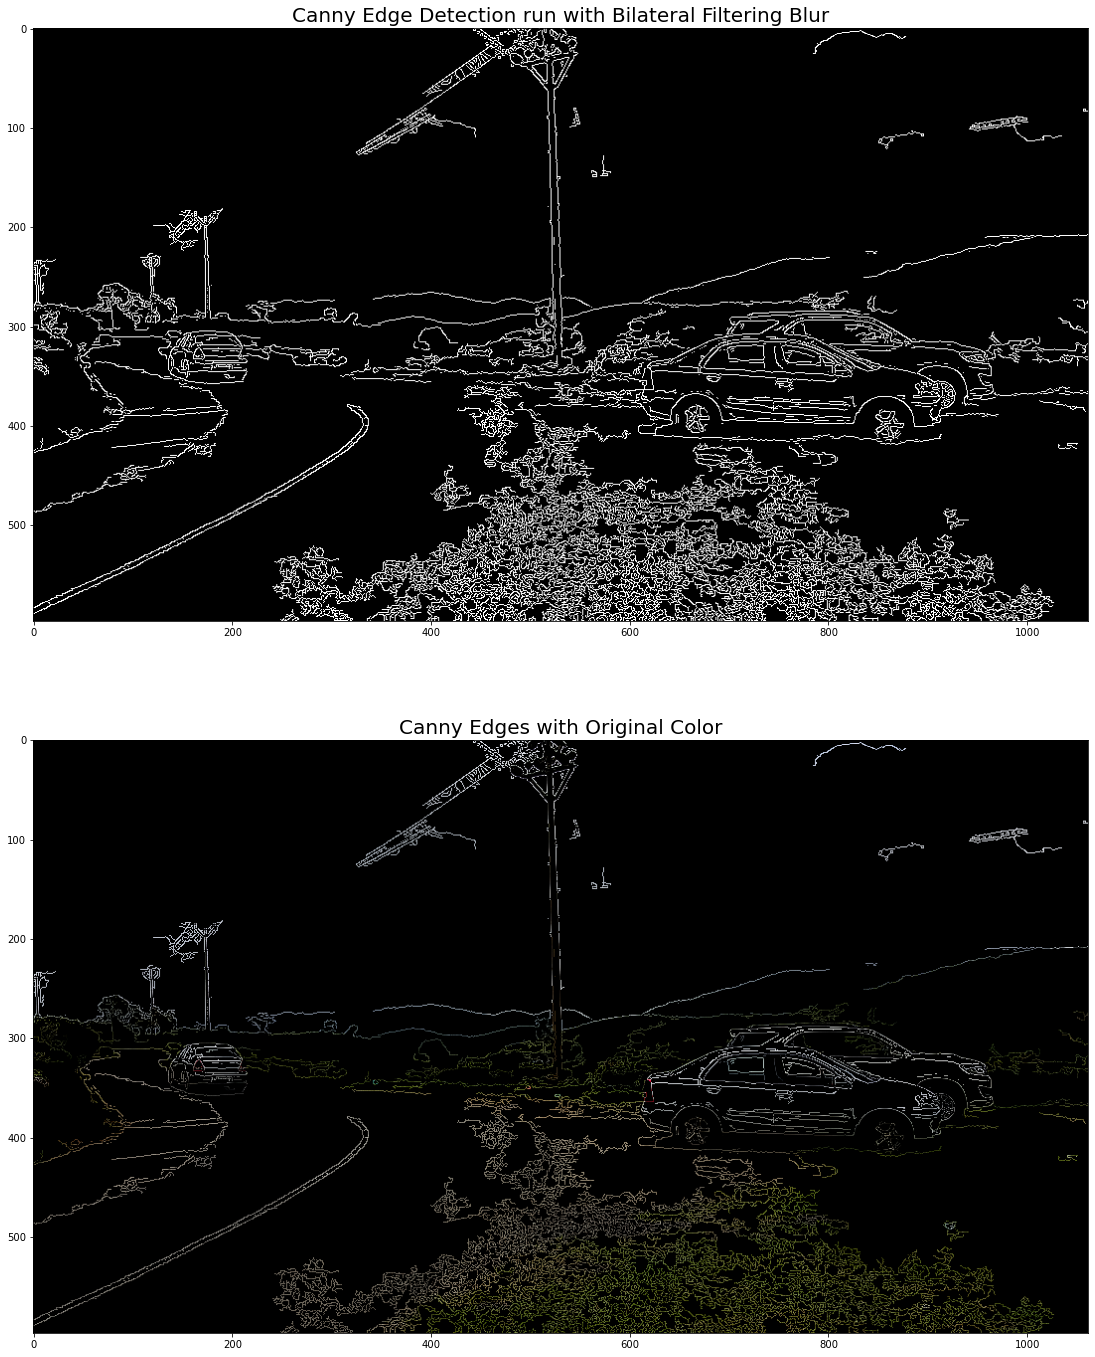

In [16]:
fig, ax = plt.subplots(2,1, figsize=(40,24))
ax[1].imshow(cv2.cvtColor(R, cv2.COLOR_BGR2RGB))
ax[1].set_title("Canny Edges with Original Color", size = 20)
ax[0].imshow(edge_img_bl,cmap = 'gray')
ax[0].set_title("Canny Edge Detection run with Bilateral Filtering Blur", size = 20);